<a href="https://colab.research.google.com/github/AnuritiGupta26/StockVision/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
!pip install yfinance --upgrade --no-cache-dir



In [45]:
import yfinance as yf

# Test with Google stock (GOOG)
ticker = "GOOG"

# Download the data for a specific period (e.g., 5 years)
data = yf.download(ticker, start="2018-01-01", end="2023-01-01")







[*********************100%***********************]  1 of 1 completed


In [48]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2018-01-02,53.059349,53.156002,52.074389,52.229331,24752000
2018-01-03,53.930225,54.120042,52.970174,53.024977,28604000
2018-01-04,54.125523,54.482741,54.006052,54.205238,20092000
2018-01-05,54.914185,55.014825,54.404515,54.504159,25582000
2018-01-08,55.148842,55.364566,54.883795,54.914185,20952000
2018-01-09,55.114967,55.329696,54.864418,55.271407,18050000
2018-01-10,54.933121,55.032263,54.609284,54.658606,20856000
2018-01-11,55.078102,55.128169,54.782662,55.116960,19566000


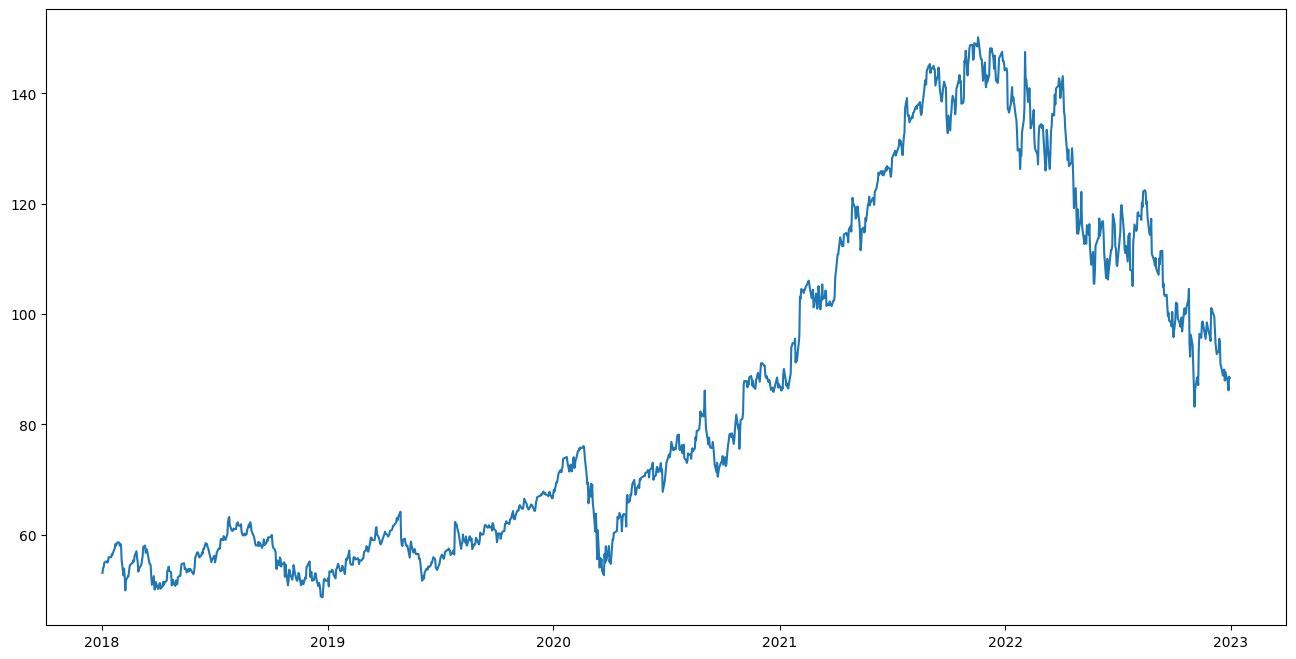

In [52]:
plt.figure(figsize=(16,8))  #figsize is basically used to increase the size
plt.plot(data['Close'], label='Closing Price')

**CLASSIFICATION PROBLEM WHETHER TO BUY(+1) OR SELL(-1) THE GOOGLE STOCK**

In [53]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()  #dropping the null values which ever i'll have

**Input Features to predict whether customer should buy or sell the stock**


In [59]:
X = data[['Open - Close' , 'High - Low']]
X.head()

Price,Open - Close,High - Low
Ticker,,
Date,,
2018-01-02,-0.830018,1.081612
2018-01-03,-0.905248,1.149868
2018-01-04,0.079715,0.476688
2018-01-05,-0.410026,0.610310
2018-01-08,-0.234657,0.480771


**INTENTION IS TO STORE +1 FOR THE BUY SIGNAL AND -1 FOR THE SELL SIGNAL.
THE TARGET VARIABLE IS "Y" FOR CLASSIFICATION TASK.**

In [61]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1) #shift = shifts the columns up or down, here data['Close'].shift(-1) is collecting the close value of next state, and its is greater than current data close value than the next day stock will become expensive +1

In [62]:
Y

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [ 1],
       [-1],
       [-1]])

In [64]:
from sklearn.model_selection import train_test_split #split our data into x and y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state = 44) # here random_state purpose is my train set and test set data gets same with yours

**IMPLEMENTATION OF KNN CLASSIFIER**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to fing the best parameter, value of k {mini no. of neigh}
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]} # Changed 'n_neighbours' to 'n_neighbors'
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(x_train,y_train)

#accuracy score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Train_data Accuracy: 0.67
Test_data Accuracy: 0.48


OUTPUT

In [76]:
prediction_classification = model.predict(x_test)

In [78]:
acutal_predicted_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': prediction_classification.ravel()})

In [79]:
acutal_predicted_data.head(10)

,Actual,Predicted
0,1,-1
1,-1,1
2,-1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,-1
8,-1,-1
9,1,1


In [80]:
y = data['Close']

**REGRESION PROBLEM BY KNN **

In [81]:
y #we are supposed to use different kind of feature but i am using y to show that regression can also be implemented


Ticker,GOOG
Date,
2018-01-02,53.059349
2018-01-03,53.930225
2018-01-04,54.125523
2018-01-05,54.914185
2018-01-08,55.148842
...,...
2022-12-23,89.488457
2022-12-27,87.615196
2022-12-28,86.150452


**IMPLEMENTATION OF KNN REGRESSION**

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

#using gridsearch to fing the best parameter, value of k {mini no. of neigh}
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and  make predictions
model_reg.fit(X_train_reg ,y_train_reg)
predictions = model_reg.predict(X_test_reg)


In [86]:
print(predictions)

[[101.19154027]
 [ 58.30224838]
 [ 95.70253245]
 [ 72.50597788]
 [ 88.46208115]
 [ 92.96749217]
 [ 97.10276794]
 [113.27565435]
 [100.71857605]
 [ 86.47146734]
 [ 76.29709066]
 [ 81.46797867]
 [ 65.18292389]
 [107.76705195]
 [104.01174088]
 [ 88.83580424]
 [ 62.14626923]
 [104.23327967]
 [ 66.45412572]
 [102.40342204]
 [ 75.62573573]
 [101.76727371]
 [ 71.67805354]
 [111.93530706]
 [ 62.85651627]
 [109.63394165]
 [ 82.93686625]
 [ 61.81153742]
 [104.92021281]
 [106.11637853]
 [ 58.20669072]
 [ 88.03976364]
 [111.67261709]
 [ 71.93180796]
 [104.75410817]
 [104.6081014 ]
 [ 84.70674082]
 [ 66.78164953]
 [117.03312276]
 [ 66.94031016]
 [ 95.6819046 ]
 [ 84.09082031]
 [ 72.35555242]
 [107.73998057]
 [ 85.11404343]
 [110.727049  ]
 [ 60.12934977]
 [ 85.98856735]
 [ 86.09169693]
 [110.77155431]
 [ 83.55006409]
 [102.85091248]
 [ 80.24573517]
 [ 98.48752416]
 [ 70.57564901]
 [ 77.76561279]
 [ 99.52230682]
 [ 72.00069377]
 [ 84.06736959]
 [ 74.71079051]
 [121.26053518]
 [111.18686244]
 [ 97.38

In [106]:
#root mean square
rms=np.sqrt(np.mean (np.power((np.array(y_test_reg)-np.array(predictions)),2)))
rms

24.767568177624185

In [108]:
valid = pd.DataFrame({'Actual Close': y_test_reg.values.ravel(), 'Predicted Close value': predictions.ravel()})

In [109]:
valid.head(10)

,Actual Close,Predicted Close value
0,143.704163,101.191540
1,57.567158,58.302248
2,64.688072,95.702532
3,73.954277,72.505978
4,75.169403,88.462081
5,107.095200,92.967492
6,76.455780,97.102768
7,72.152252,113.275654
8,122.440056,100.718576
9,123.698044,86.471467
